In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline



In [3]:
df = pd.read_excel('SVM_1.xlsx')

In [4]:
from sklearn import svm
X = np.array(df)
Y = np.array(df['Sex'])


In [5]:
df

,Sex,Height
0,1,150
1,1,160
2,1,170
3,0,180
4,0,190
5,0,200


In [6]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
clf.predict([[1, 178]])

array([0])

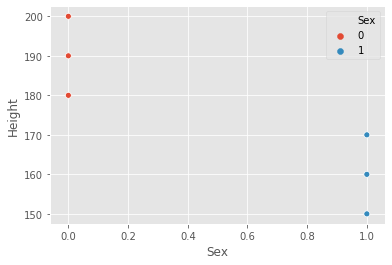

In [8]:
sns.scatterplot(x = df['Sex'], y = df['Height'], data = df, hue = 'Sex')

In [9]:
support = clf.support_vectors_
support

array([[  0., 180.],
       [  1., 170.]])

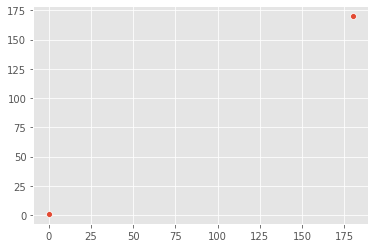

In [10]:
sns.scatterplot(x = support[0], y = support[1])

In [21]:
clf.support_vectors_

array([[  0., 180.],
       [  1., 170.]])

In [14]:
w = clf.coef_
w.shape

(1, 2)

In [20]:
w = clf.coef_[0]
w

array([ 0.01980198, -0.1980198 ])

In [17]:
b = clf.intercept_
b

array([34.64356436])

In [174]:
m = - w[0] / w[1] 

In [175]:
b = b / w[1]
#b1 = (b + 1) / w[1]
#b2 = (b - 1) / w[1]

In [176]:
xx = np.linspace(min(X[:,0]), max(X[:,0]), num = 6) 

In [177]:
yy = m * xx - b
#yy1 = m * xx - b1
#yy2 = m * xx - b2

In [178]:
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_down = yy - np.sqrt(1 + m ** 2) * margin
yy_up = yy + np.sqrt(1 + m ** 2) * margin

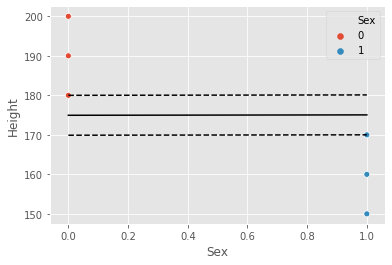

In [180]:
sns.scatterplot(x = df['Sex'], y = df['Height'], data = df, hue = 'Sex')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
